In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
nadia = cv2.imread('../../notebooks/DATA/Nadia_Murad.jpg', cv2.IMREAD_GRAYSCALE)
denis = cv2.imread('../../notebooks/DATA/Denis_Mukwege.jpg', cv2.IMREAD_GRAYSCALE)
solvay = cv2.imread('../../notebooks/DATA/solvay_conference.jpg', cv2.IMREAD_GRAYSCALE)

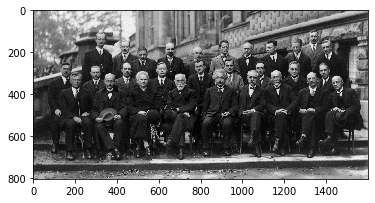

In [4]:
plt.imshow(solvay, cmap='gray')

In [5]:
face_cascade = cv2.CascadeClassifier('../../notebooks/DATA/haarcascades/haarcascade_frontalface_default.xml')
face_cascade

<CascadeClassifier 0000018C893E20F0>

In [6]:
def detect_face(img):
    face_img = img.copy()

    face_rectangle = face_cascade.detectMultiScale(face_img)

    for x, y, w, h in face_rectangle:
        cv2.rectangle(img=face_img, pt1=(x, y), pt2=(x + w, y + h), color=(255, 255, 255), thickness=10)

    return face_img

In [7]:
result = detect_face(denis)

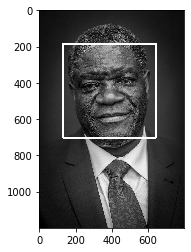

In [8]:
plt.imshow(result, cmap='gray')

In [9]:
result = detect_face(nadia)

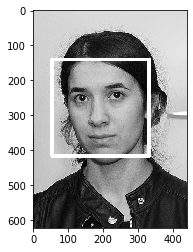

In [10]:
plt.imshow(result, cmap='gray')

In [11]:
result = detect_face(solvay)

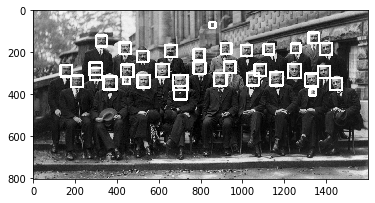

In [12]:
plt.imshow(result, cmap='gray')

In [13]:
# In order to optimize the detections.
def adj_detect_face(img):

    face_img = img.copy()

    face_rectangle = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)

    for x, y, w, h in face_rectangle:
        cv2.rectangle(face_img, pt1=(x, y), pt2=(x + w, y + h), color=(255, 255, 255), thickness=5)

    return face_img

In [14]:
result = adj_detect_face(solvay)

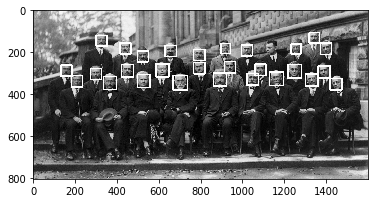

In [15]:
plt.imshow(result, cmap='gray')

In [16]:
# With a different cascade file.
eye_cascade = cv2.CascadeClassifier('../../notebooks/DATA/haarcascades/haarcascade_eye.xml')

In [17]:
def detect_eye(img):

    eye_image = img.copy()

    eye_rectangle = eye_cascade.detectMultiScale(eye_image, scaleFactor=1.2, minNeighbors=5)

    for x, y, w, h in eye_rectangle:
        cv2.rectangle(eye_image, (x, y), (x + w, y + h), 255, 10)

    return eye_image

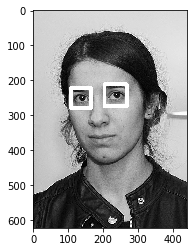

In [18]:
result = detect_eye(nadia)
plt.imshow(result, cmap='gray')

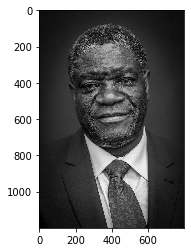

In [19]:
result = detect_eye(denis)
plt.imshow(result, cmap='gray')

In [20]:
# With a video.
capture = cv2.VideoCapture(0)

width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

while capture.isOpened():

    _, frame = capture.read()

    detected_face = adj_detect_face(frame)

    cv2.imshow('face_detect', detected_face)

    if cv2.waitKey(1) & 0xFF == 27:
        break

capture.release()
cv2.destroyWindow('face_detect')